In [25]:
import seaborn as sbn
import matplotlib.pyplot as plt
import sqlite3 as sql
import pandas as pd
import csv

%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [2]:
con = sql.connect("Titanic.db")
cursor = con.cursor()

%sql sqlite:///Titanic.db

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.to_sql("TITANIC_DATA", con, if_exists='replace', index=False, method="multi")

891

In [5]:
import prettytable

prettytable.DEFAULT = "DEFAULT"

In [6]:
%sql SELECT * FROM TITANIC_DATA LIMIT 5

 * sqlite:///Titanic.db
Done.


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,None,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,None,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,None,S


 * sqlite:///Titanic.db
Done.


<function matplotlib.pyplot.show(close=None, block=None)>

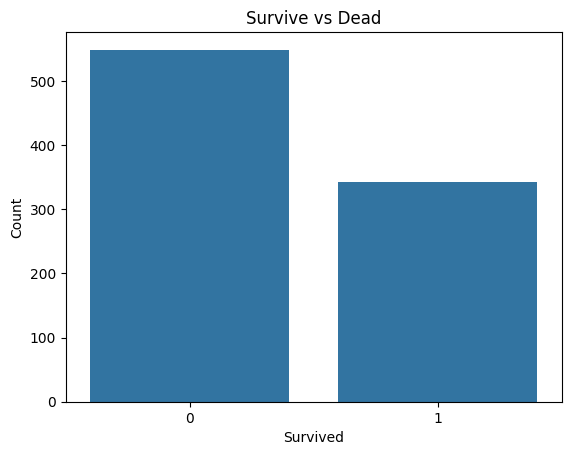

In [26]:
survival = %sql SELECT Survived, COUNT(*) AS Count FROM TITANIC_DATA GROUP BY Survived

dataframe = survival.DataFrame()
plot = sbn.barplot(x='Survived',y='Count', data=dataframe)
plt.title("Survive vs Dead")
plt.show

 * sqlite:///Titanic.db
Done.


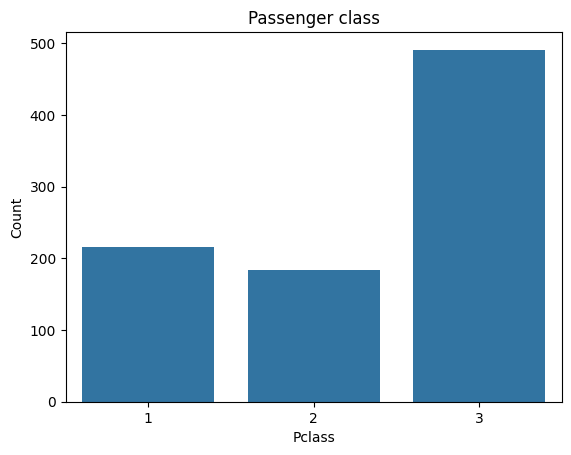

In [31]:
passenger_class = %sql SELECT COUNT(*) AS Count, Pclass FROM TITANIC_DATA GROUP BY Pclass

dataframe = passenger_class.DataFrame()
plot = sbn.barplot(x="Pclass", y="Count", data=dataframe)
plt.title("Passenger class")
plt.show()

 * sqlite:///Titanic.db
Done.


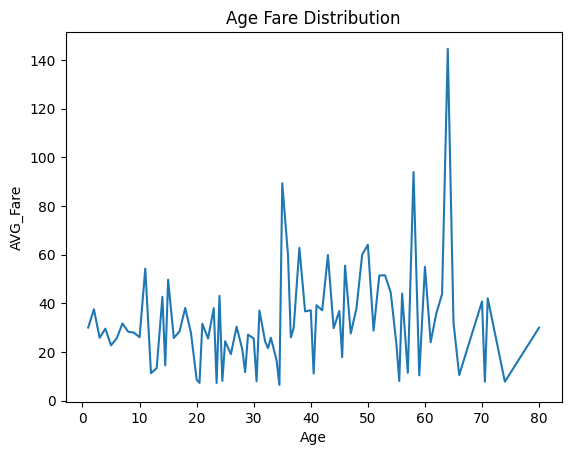

In [41]:
age_fare = %sql SELECT Age, AVG(Fare) AS AVG_Fare FROM TITANIC_DATA WHERE Age >= 1 GROUP BY aGE

dataframe = age_fare.DataFrame()
plot = sbn.lineplot(x="Age", y="AVG_Fare", data=dataframe)
plt.title("Age Fare Distribution")
plt.show()